In [10]:
"""
Demo notebook for Scientific Graph Agent.

This script demonstrates:
1. Basic usage of the agent graph
2. Memory functionality across multiple queries
3. Graph visualization
4. How the conditional loop works
"""

'\nDemo notebook for Scientific Graph Agent.\n\nThis script demonstrates:\n1. Basic usage of the agent graph\n2. Memory functionality across multiple queries\n3. Graph visualization\n4. How the conditional loop works\n'

# 🧪 Scientific Graph Agent - Demo

This notebook demonstrates a simple agent graph for scientific paper exploration using LangGraph + ArXiv API with memory support.

In [11]:
import os
from dotenv import load_dotenv
# Load environment variables from .env file
load_dotenv()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
LLM_MODEL = "gpt-5-mini"

In [13]:
# Verify that API keys are set
if not os.getenv("OPENAI_API_KEY"):
    raise ValueError("⚠️  OPENAI_API_KEY not found in .env file")

print("✅ Environment variables loaded")

✅ Environment variables loaded


In [14]:
cd ..

/Users/linafaik/Documents/projects


## Graph Agent Initialization

The shared state has been refactored into `InputState`, `OutputState`, and `InternalState` (see `src/agent_graph/state.py`).
We now import the graph constructor directly to reflect that structure.


In [15]:
from src.agent_graph.graph import create_graph

# Create graph with custom parameters (state handled via InternalState reducers)
graph = create_graph(with_checkpointer=True)

print("✅ Agent graph created")


✅ Graph compiled with memory enabled
✅ Agent graph created


### Graph Visualization

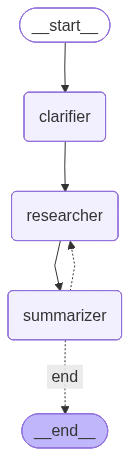

Graph structure:
START → clarifier → researcher → summarizer → END
           ↑            ↓
           └─(if <3 papers)


In [16]:
from IPython.display import Image, display
    
# Generate graph visualization as PNG
display(Image(graph.get_graph().draw_mermaid_png()))
print("Graph structure:")
print("START → clarifier → researcher → summarizer → END")
print("           ↑            ↓")
print("           └─(if <3 papers)")

## Tests

### Test 1: Simple Research Query

In [17]:
from langchain_core.messages import HumanMessage

# Configuration for this run (needed for memory/checkpointing)
config = {"configurable": {"thread_id": "demo-thread-1"}}

question = "What are the key innovations in transformer architectures?"

# Provide required fields directly in state (no nested 'config' dict)
initial_state = {
    "query": question,
    "llm_model": LLM_MODEL,
    "llm_temperature": 0,
    "max_papers": 5,
    "max_iterations": 2,
}

print("Starting agent graph execution...\n")

# Invoke the graph
result = graph.invoke(initial_state, config=config)
result

2025-11-02 21:29:02,736 - INFO - 🎯 Clarifying query: 'What are the key innovations in transformer architectures?'


Starting agent graph execution...

state
{'query': 'What are the key innovations in transformer architectures?', 'llm_model': 'gpt-5-mini', 'llm_temperature': 0, 'max_papers': 5, 'max_iterations': 2, 'papers': [], 'messages': []}


2025-11-02 21:29:07,801 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-11-02 21:29:07,815 - INFO - ✨ Refined query: 'transformer architecture innovations attention variants positional encodings'
2025-11-02 21:29:07,819 - INFO - Searching ArXiv: 'transformer architecture innovations attention variants positional encodings' (iteration 0)
2025-11-02 21:29:08,827 - INFO - Found 5 papers
2025-11-02 21:29:08,828 - INFO - Scoring paper relevance...
2025-11-02 21:29:12,333 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-11-02 21:29:12,340 - INFO -   📄 AttentionSmithy: A Modular Framework for Rapid Transformer D... - Score: 60
2025-11-02 21:29:16,708 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-11-02 21:29:16,723 - INFO -   📄 Stable, Fast and Accurate: Kernelized Attention with Relativ... - Score: 65
2025-11-02 21:29:21,520 - INFO - HTTP Request: POST htt

{'summary': '## Résumé\n• Kernelized and linearized attention improve scalability by approximating the softmax-based attention kernel, trading exactness for sub-quadratic or linear complexity while retaining accuracy; combining these kernels with relative positional encoding helps keep long-range structure without quadratic cost [Paper 1].  \n• Positional encodings remain central but are evolving: Context-aware extensions to Rotary Positional Embeddings introduce input-dependent frequency patterns to better capture local sequence context and reduce the mismatch between static encodings and dynamic inputs [Paper 4].  \n• New theoretical lenses (e.g., image-filtering perspectives) make attention more interpretable by showing when self-attention behaves like learned filtering versus when it provides distinct global interactions, guiding principled architectural modifications and better inductive biases [Paper 3].  \n• Engineering and adoption accelerate when transformer components are mod

In [13]:
# Display results
print("\n" + "="*80)
print("FINAL RESULT")
print("="*80)
print(f"- Papers found: {len(result['papers'])}")
print(f"\n{result['summary']}")


FINAL RESULT
- Papers found: 5

## Résumé
• The RWKV architecture introduces a linear attention mechanism that enhances training efficiency akin to Transformers while improving inference efficiency similar to RNNs, marking a significant advancement in language modeling [Paper 1].  
• The \METHOD architecture addresses unique challenges in healthcare by modularizing transformer components to better handle irregular patient timelines and complex contextual relationships, showcasing adaptability in specialized domains [Paper 2].  
• GLOD combines Swin Transformers with novel UpConvMixer blocks for high-resolution satellite imagery object detection, achieving superior performance compared to traditional CNN-based methods, thus illustrating the potential of hybrid architectures [Paper 3].  
• The ADROIT6G framework emphasizes the need for open and programmable architectures in 6G networks, highlighting the role of advanced transformer models in meeting stringent performance and reliability

In [15]:
follow_up_question = "Can you give more detail regarding your first point?"

# IMPORTANT: Only pass the new query, not the full config
# The checkpointer will restore previous state (messages, papers, etc.)
follow_up_state = {
    "query": follow_up_question,
}

print("\n\nAsking follow-up question...\n")

# Use the SAME config with the same thread_id
# The checkpointer loads previous messages, papers, config automatically
follow_up_result = graph.invoke(follow_up_state, config=config)

print("\n" + "="*80)
print("FOLLOW-UP RESULT")
print("="*80)
print(f"- Papers found: {len(result['papers'])}")
print(f"\n{result['summary']}")

2025-11-02 21:12:25,063 - INFO - 🎯 Clarifying query: 'Can you give more detail regarding your first point?'




Asking follow-up question...



2025-11-02 21:12:25,790 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-11-02 21:12:25,811 - INFO - ✨ Refined query: 'Refined query: RWKV architecture advancements in language modeling'
2025-11-02 21:12:27,353 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-11-02 21:12:27,386 - INFO - Searching ArXiv: 'Refined query: RWKV architecture advancements in language modeling' (iteration 0)
2025-11-02 21:12:28,462 - INFO - Found 5 papers
2025-11-02 21:12:28,463 - INFO - Scoring paper relevance...
2025-11-02 21:12:29,019 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-11-02 21:12:29,025 - INFO -   📄 Effectiveness of Deep Networks in NLP using BiDAF as an exam... - Score: 75
2025-11-02 21:12:29,522 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-11-02 21:12:29,546 - INFO -   📄 RIRO: Reshaping Inputs, Refining Outpu


FOLLOW-UP RESULT
- Papers found: 5

## Résumé
• The RWKV architecture introduces a linear attention mechanism that enhances training efficiency akin to Transformers while improving inference efficiency similar to RNNs, marking a significant advancement in language modeling [Paper 1].  
• The \METHOD architecture addresses unique challenges in healthcare by modularizing transformer components to better handle irregular patient timelines and complex contextual relationships, showcasing adaptability in specialized domains [Paper 2].  
• GLOD combines Swin Transformers with novel UpConvMixer blocks for high-resolution satellite imagery object detection, achieving superior performance compared to traditional CNN-based methods, thus illustrating the potential of hybrid architectures [Paper 3].  
• The ADROIT6G framework emphasizes the need for open and programmable architectures in 6G networks, highlighting the role of advanced transformer models in meeting stringent performance and reliabi

### Test 2: Query with Few Results (Triggers Loop)

In [ ]:
from langchain_core.messages import HumanMessage

# Configuration for this run (needed for memory/checkpointing)
config = {"configurable": {"thread_id": "demo-thread-1"}}

question = "quantum machine learning for protein folding using NISQ devices"

initial_state = {
    "query": question,
    "llm_model": LLM_MODEL,
    "llm_temperature": 0,
    "max_papers": 5,
    "max_iterations": 2,
}

print("Starting agent graph execution...\n")

# Invoke the graph
result = await graph.invoke(initial_state, config=config)

# Display results
print("\n" + "="*80)
print("FINAL RESULT")
print("="*80)
print(f"\n- Original query: {result['query']}")
print(f"- Refined query: {result['refined_query']}")
print(f"- Papers found: {len(result['papers'])}")
print(f"- Iterations: {result['iteration']}")
print(f"\n{result['summary']}")

Starting agent graph execution...

🎯 Clarifying query: 'quantum machine learning for protein folding using NISQ devices'


2025-10-21 17:56:50,186 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-21 17:56:50,195 - INFO - Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=NISQ+variational+quantum+algorithms+protein+folding&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=100


✨ Refined query: 'NISQ variational quantum algorithms protein folding'
🔍 Searching ArXiv: 'NISQ variational quantum algorithms protein folding' (iteration 1)


2025-10-21 17:56:51,175 - INFO - Got first page: 100 of 835056 total results


📚 Found 5 papers
📝 Synthesizing 5 papers...


2025-10-21 17:57:14,021 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


✅ Summary generated

FINAL RESULT

- Original query: quantum machine learning for protein folding using NISQ devices
- Refined query: NISQ variational quantum algorithms protein folding
- Papers found: 5
- Iterations: 2

## Résumé
• NISQ-oriented algorithms adapt protein folding to near-term gate-based devices by using hybrid classical–quantum workflows and compressed evolutions (digitized counterdiabatic, variational ansätze). These approaches aim to reduce circuit depth and runtime while keeping the search for low-energy conformations feasible on limited hardware [Paper 1, Paper 2].  
• Problem encoding and lattice models are central: mapping amino-acid chains to lattice representations (cubic, tetrahedral) and compact encodings markedly lowers qubit and gate counts, at the cost of model fidelity. Efficient encodings also enable exploring free-energy landscapes more directly on quantum hardware [Paper 3, Paper 4].  
• Variational and QAOA-like methods (including alternating‑operator 

In [18]:
list(graph.get_state_history(config))

[StateSnapshot(values={'query': 'What are the key innovations in transformer architectures?', 'llm_model': 'gpt-5-mini', 'llm_temperature': 0, 'max_papers': 5, 'max_iterations': 2, 'summary': '## Résumé\n• Kernelized and linearized attention improve scalability by approximating the softmax-based attention kernel, trading exactness for sub-quadratic or linear complexity while retaining accuracy; combining these kernels with relative positional encoding helps keep long-range structure without quadratic cost [Paper 1].  \n• Positional encodings remain central but are evolving: Context-aware extensions to Rotary Positional Embeddings introduce input-dependent frequency patterns to better capture local sequence context and reduce the mismatch between static encodings and dynamic inputs [Paper 4].  \n• New theoretical lenses (e.g., image-filtering perspectives) make attention more interpretable by showing when self-attention behaves like learned filtering versus when it provides distinct glo

### Test 3: Memory Demonstration

In [ ]:
from langchain_core.messages import HumanMessage

config = {"configurable": {"thread_id": "demo-thread-3"}}

# First query
question1 = "Explain attention mechanisms"
result1 = await graph.invoke({
    "query": question1,
    "llm_model": LLM_MODEL,
    "llm_temperature": 0,
    "max_papers": 5,
    "max_iterations": 2,
}, config=config)

print(f"✅ First query completed - {len(result1['messages'])} messages in memory")

# Second query (same thread, memory persists automatically via checkpointer)
question2 = "What about self-attention?"
result2 = await graph.invoke({
    "query": question2,
    "llm_model": LLM_MODEL,
    "llm_temperature": 0,
    "max_papers": 5,
    "max_iterations": 2,
}, config=config)

print(f"✅ Second query completed - {len(result2['messages'])} messages in memory")

# Display message history
print("\n📜 Message History:")
for i, msg in enumerate(result2['messages'][-5:], 1):  # Show last 5 messages
    msg_type = msg.__class__.__name__
    name = getattr(msg, 'name', 'Unknown')
    content_preview = msg.content[:100] + "..." if len(msg.content) > 80 else msg.content
    print(f"  {i}. [{msg_type}] {name}: {content_preview}")

🎯 Clarifying query: 'Explain attention mechanisms'


2025-10-21 17:57:20,220 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-21 17:57:20,226 - INFO - Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=attention+mechanisms+in+neural+networks+review&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=100


✨ Refined query: 'attention mechanisms in neural networks review'
🔍 Searching ArXiv: 'attention mechanisms in neural networks review' (iteration 0)


2025-10-21 17:57:21,480 - INFO - Got first page: 100 of 2705421 total results


📚 Found 5 papers
📝 Synthesizing 5 papers...


2025-10-21 17:57:45,685 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


✅ Summary generated
✅ First query completed - 4 messages in memory
🎯 Clarifying query: 'What about self-attention?'


2025-10-21 17:57:51,946 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-21 17:57:51,955 - INFO - Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=self-attention+mechanisms+in+transformers&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=100


✨ Refined query: 'self-attention mechanisms in transformers'
🔍 Searching ArXiv: 'self-attention mechanisms in transformers' (iteration 1)


2025-10-21 17:57:53,036 - INFO - Got first page: 100 of 2695572 total results


📚 Found 5 papers
📝 Synthesizing 5 papers...


2025-10-21 17:58:17,979 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


✅ Summary generated
✅ Second query completed - 8 messages in memory

📜 Message History:
  1. [AIMessage] Summarizer: ## Résumé
• Attention is a mechanism that selects and differentially weights parts of an input so a ...
  2. [HumanMessage] User: What about self-attention?
  3. [AIMessage] Clarifier: Refined query: self-attention mechanisms in transformers
  4. [AIMessage] Researcher: Found 5 papers on ArXiv for query: self-attention mechanisms in transformers
  5. [AIMessage] Summarizer: ## Résumé
• Self-attention emerges from a more general principle of learned pairwise affinity matric...


## View Results in LangSmith Studio

### Option 1: View Past Runs (Tracing)

If you have `LANGCHAIN_TRACING_V2=true` in your `.env`:
1. Go to https://smith.langchain.com
2. Navigate to your project (e.g., "scientific-graph-agent")
3. Click on any run to see:
   - Full execution trace
   - Each node's input/output
   - LLM calls and tokens used
   - Execution time per node

### Option 2: Interactive Studio (Live Development)

To interact with your graph in real-time:

```bash
# In your terminal, run:
langgraph dev

# This will open in browser:
# https://smith.langchain.com/studio/?baseUrl=http://127.0.0.1:2024
```

The Studio provides:
- **Visual graph editor** - See your nodes and edges
- **Interactive chat** - Test queries in real-time
- **State inspector** - View state after each node
- **Thread history** - Browse past conversations by thread_id
- **Debugger** - Step through execution node by node

**Quick Setup for Studio:**

1. Ensure `langgraph.json` exists in project root
2. Start the server: `langgraph dev`
3. Open https://smith.langchain.com/studio/?baseUrl=http://127.0.0.1:2024
4. Click "New Thread" and type your question
5. Watch the graph execute in real-time!


## Cache

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_community.cache import InMemoryCache
import time

from langchain_core.globals import set_llm_cache
set_llm_cache(InMemoryCache())

llm = ChatOpenAI(model="gpt-5-nano")

question = "What is a CNN?"

# First call - hits the LLM (slow)
print("First call:")
start = time.time()
response1 = llm.invoke(question)
time1 = time.time() - start
print(f"Response: {response1.content[:100]}...")
print(f"⏱️  Time: {time1:.3f}s\n")

# Second call - returns from cache (fast!)
print("Second call (cache HIT):")
start = time.time()
response2 = llm.invoke(question)
time2 = time.time() - start
print(f"Response: {response2.content[:100]}...")
print(f"⏱️  Time: {time2:.3f}s\n")

# Compare
if time2 < time1 * 0.1:  # Cache should be 10x+ faster
    print(f"✅ Cache working! Speedup: {time1/time2:.1f}x faster")
else:
    print(f"❌ Cache might not be working")

First call (cache MISS):
Response: Most commonly, CNN stands for Convolutional Neural Network. Here’s a concise overview:

- What it is...
⏱️  Time: 6.929s

Second call (cache HIT):
Response: Most commonly, CNN stands for Convolutional Neural Network. Here’s a concise overview:

- What it is...
⏱️  Time: 0.002s

✅ Cache working! Speedup: 4304.5x faster
